# 서포트 벡터 머신
- SVM은 매우 강력하고 선형, 비선형, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 모델
- SVM은 특히 복잡한 분류 문제, 중간 크기의 데이터셋에 적합
- SVM은 특성의 스케일에 굉장히 민감

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 5.1 선형 SVM 분류
- 라지 마진 분류: 마진에 데이터가 없고 도로로부터 최대한 멀리 떨어지게 만드는 것(도로 밖에 샘플을 추가해도 결정 경계에 영향 없음)

In [2]:
from sklearn.svm import SVC # SVC ==> 표준적으로 구현된 SVM
from sklearn import datasets

iris = datasets.load_iris() # 아이리스 데이터
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) # setosa or vesicolor면 True
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf")) # kernel ==> decision boundary의 모양
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

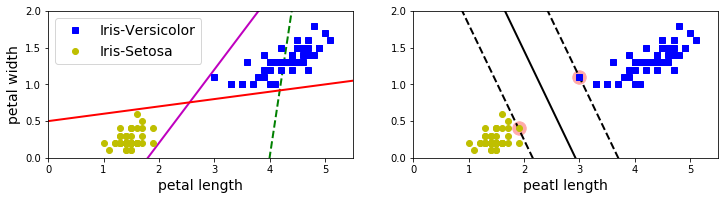

In [3]:
# 라지 마진 분류 그래프(일반 직선분류와 서포트 벡터 머신)
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0] # SVM 계수들 저장
    b = svm_clf.intercept_[0] # SVM 상수항 저장

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로 => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1] # 결정 경계값 저장

    margin = 1/w[1] # 마진 저장
    gutter_up = decision_boundary + margin # 결정 경계 상한값 저장
    gutter_down = decision_boundary - margin # 결정 경계 하한값 저장

    svs = svm_clf.support_vectors_ # support_vectors_ ==> 각 클래스의 서포트의 x값(x^+,x^-)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2) # 결정 경계 그리기
    plt.plot(x0, gutter_up, "k--", linewidth=2) # 결정 경계 상한 그리기
    plt.plot(x0, gutter_down, "k--", linewidth=2) # 경정 경계 하한 그리기
    
plt.figure(figsize=(12,2.7))

plt.subplot(121) # 나쁜 모델
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor") # sepal length(y=1)를 x로 sepla width(y=1)를 y로 청색 네모
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa") # sepal length(y=0)를 x로 sepla width(y=0)를 y로 노란 원
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # sepal length(y=1)를 x로 sepla width(y=1)를 y로 청색 네모
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # sepal length(y=0)를 x로 sepla width(y=0)를 y로 노란 원
plt.xlabel("peatl length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

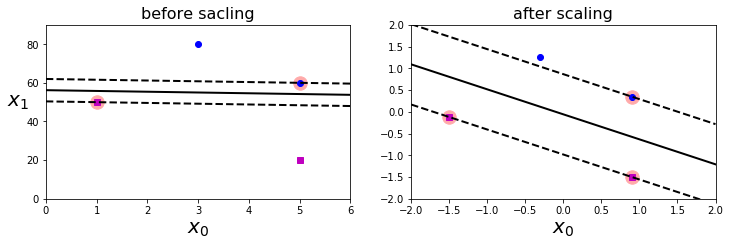

In [4]:
# 특성의 스케일에 민감
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("before sacling", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("after scaling", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

### 5.1.1 소프트 마진 분류
- 하드 마진 분류: 모든 샘플이 도로 바깥에 올바르게 분류하는 것(단, 데이터가 선형으로 구분되야 하며 이상치에 민감)
- 소프트 마진 분류: 도로를 가능한 넓게 유지하려는 것과 마진 오류 사이에 적절한 균형을 찾는 것

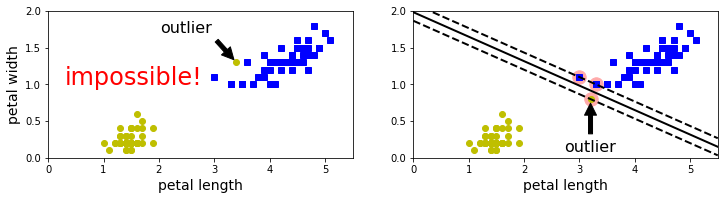

In [5]:
# 이상치에 민감
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9) # C가 줄어들면 도로의 폭이 넓어지지만, 마진 오류도 커짐
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "impossible!", fontsize=24, color="red")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.annotate("outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("petal length", fontsize=14)
plt.annotate("outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC # LinearSVC ==> 선형 분류에 특화된 SVM(선형 분류 가능할 경우 속도가 빠름)

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica면 True

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [8]:
# 규제 C(마진 오류 허용 정도 - C가 크면 마진 오휴 허용 줄어듬(boundary 굴곡이 강해짐))에 따른 차이
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [9]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

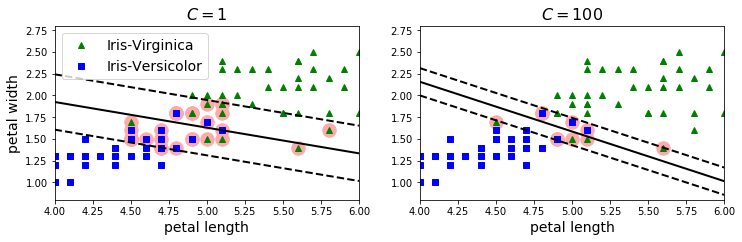

In [10]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])
plt.show()

## 5.2 비선형 분류

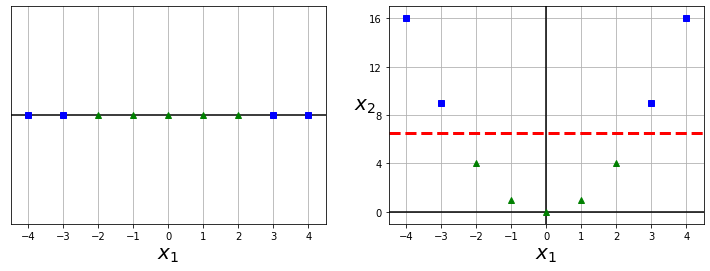

In [11]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show() # 왼쪽 그래프와 같은 경우 선형으로는 구분할 수 없음

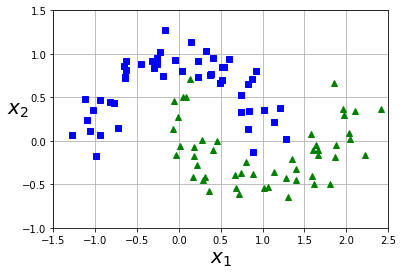

In [12]:
from sklearn.datasets import make_moons # make_moons ==> 초승달 모양 클러스터 두 개의 형상을 생성하는 함수

X, y = make_moons(n_samples=100, noise=0.15, random_state=42) # n_samples ==> 표본 수(디폴트 100) // noise ==> 잡음(0이면 완벽한 반원)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000, random_state=42))
    ]) # 파이프라인(다항식 -> 표준화 -> SVM)

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=2000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

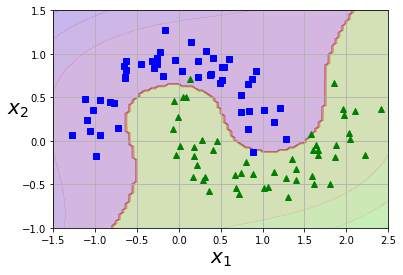

In [14]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) # meshgrid ==> 두 배열의 가능한 조합을 모두 생성
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape) # 예측
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2) # 색으로 구분
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5]) # plot_dataset 사용자 정의 함수 사용
plt.show()

#### 5.2.1 다항식 커널
- 커널 트릭: 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 효과를 얻음

In [15]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ]) # degree ==> 차수 // coef0 ==> 모델이 차수에 따라 받는 영향의 정도(기본값 0)
poly_kernel_svm_clf.fit(X, y) # d=3, r=1, c=5인 1번 모델

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [16]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y) # d=10, r=100, c=5인 2번 모델

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

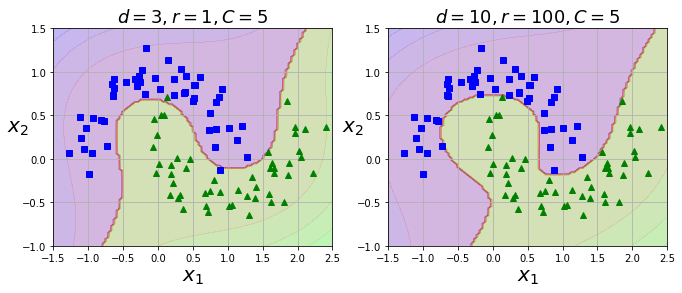

In [17]:
# 1,2번 모델 차이 그래프
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5]) # plot_predictions 사용자 정의 함수 사용
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5]) # plot_dataset 사용자 정의 함수 사용
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

#### 5.2.2 유사도 특성 추가
- 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수를 계산한 특성을 추가한 것

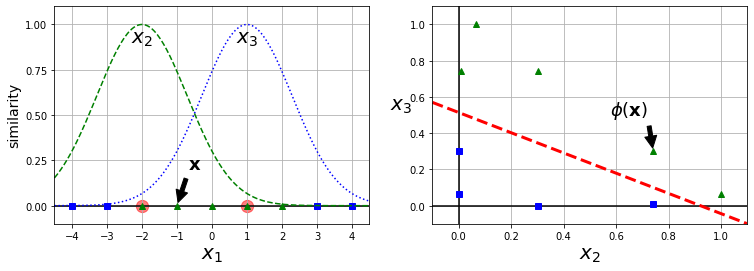

In [18]:
# 유사도 특성 그래프(추후 이해 필요함...)
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma) # landmark -2로 기준
x3s = gaussian_rbf(x1s, 1, gamma) # landmark 1로 기준

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)] # X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both') # 격자
plt.axhline(y=0, color='k') # X축
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red") # (-2,0), (1,0) 붉은 점 표시
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs") # y=0인 x축위의 청색 네모
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^") # y=1인 x축 위의 녹색 세모
plt.plot(x1s, x2s, "g--") # landmark -2기준 gaussian_rbf
plt.plot(x1s, x3s, "b:") # landmark 1기준 gaussian_rbf
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1]) # y축 값
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k') # x축
plt.axvline(x=0, color='k') # y축
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs") # 청색 네모
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^") # 녹색 세모 
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show() # 유사도 특성을 이용하여 오른쪽 그림과 같이 변환되어 선형적으로 구분 가능해짐

In [19]:
# 임의의 점 (3,0)에 대한 두 랜드마크의 유사도 특성 값
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


#### 5.2.3 가우시안 RBF 커널

In [20]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ]) # gamma ==> boundary의 굴곡에 영향을 줌(과대적합: gamma 감소, 과소적합: gamma 증가 // C와 비슷)
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

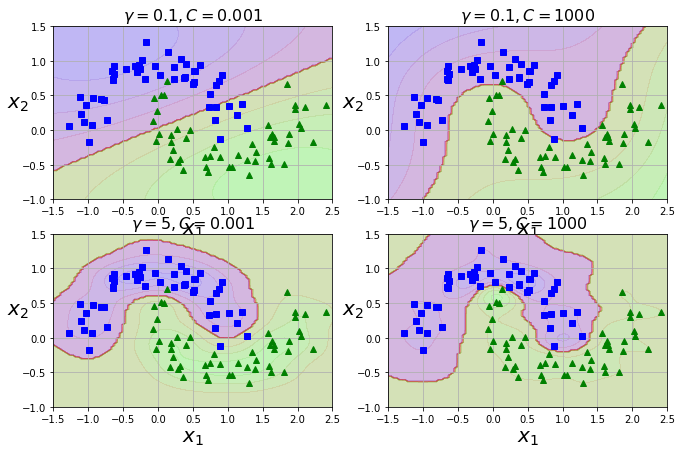

In [21]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf) # 모델 저장

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5]) # plot_predictions 사용자 정의 함수 사용
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5]) # plot_dataset 사용자 정의 함수 사용
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.show() # gamma와 c가 커지면 boundary가 더 굴곡이 많이 생김

#### 커널
- SVM에서는 대부분 선형커널(kernel='linear' or LinearSVC)를 먼저 해보는데 특히 데이터가 아주 크거나 특성 수가 많을 떄 더욱 그렇다. 만약 데이터가 크지 않다면 가우시안 RBF 커널을 시도해 볼 수 있다.

### 5.2.4 계산 복잡도
- LinearSVC는 선형SVM을 위한 최적화 알고리즘을 구현한 liblinear 라이브러리를 기반으로 훈련 샘플과 특성 수에 선형적으로 늘어남
- SVC는 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 하며 훈련 샘플 수가 커지면 급격히 증가함(단, 희소 특성인 경우 잘 확장됨)

#### 결과 (시간 복잡도 // 외부 메모리 학습 지원 // 스케일 조정의 필요성 // 커널 트릭)
- SVC ( O(m^2*n) ~ O(m^3*n) // 아니오 // 예 // 예 )
- LinearSVC( O(m*n) // 아니오 // 예 // 아니오 )
- SGDClassifier( O(m*n) // 예 // 예 // 아니오 )

## 5.3 SVM 회귀
- 분류와 반대로 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 최대가 되도록 하는 대신, 도로 안에 가능한 많은 샘플이 들어가도록 학습

In [22]:
np.random.seed(42)
m = 50 # sample size
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [23]:
from sklearn.svm import LinearSVR # LinearSVR ==> 선형 SVM 회귀(LinearSVC의 회귀 버전)

svm_reg = LinearSVR(epsilon=1.5, random_state=42) # epsilon ==> 도로의 폭
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [24]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42) # 도로의 폭 1.5
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42) # 도로의 폭 0.5
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y): # 서포트 벡터 위치를 찾아 반환하는 함수
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin) # argwhere ==> 특정 값의 위치를 찾음

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

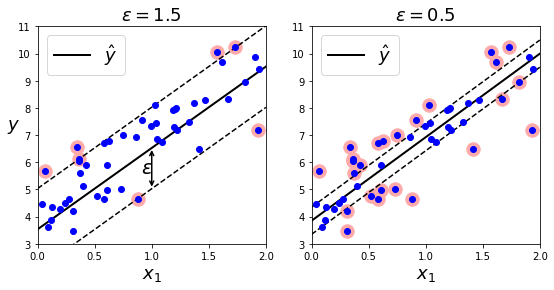

In [25]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1) # x축 범위를 100개로 나눔
    y_pred = svm_reg.predict(x1s) # 예측
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$") # y hat 직선
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--") # 결정 경계 상한
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--") # 경정 경계 하한
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA') # 서포트 벡터들 붉은 점
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    ) # x=1에서 예측값과 결정 경계 하한 사이에 화살표 추가
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20) # epsilon 특수문자 추가
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [26]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [27]:
from sklearn.svm import SVR # SVR ==> 비선형 SVM 회귀(SVC의 회귀 버전)

svm_poly_reg = SVR(kernel="poly", gamma='auto', degree=2, C=100, epsilon=0.1)
# auto ==> 특성 수의 역수, scale ==> 특성 수*표준편차의 역수(스케일 조정 안된 데이터에서 더 좋음 // 사이킷런 0.22부터 기본값)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
svm_poly_reg1 = SVR(kernel="poly", gamma='auto', degree=2, C=100, epsilon=0.1) # 규제 많음
svm_poly_reg2 = SVR(kernel="poly", gamma='auto', degree=2, C=0.01, epsilon=0.1) # 규제 적음
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

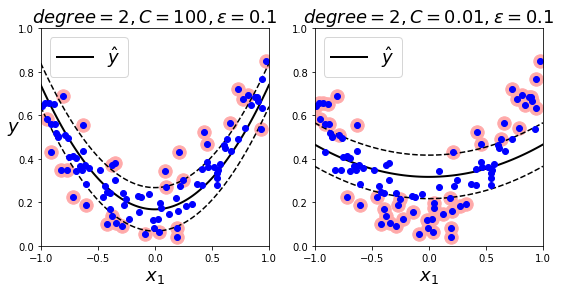

In [29]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1]) # plot_svm_regression 사용자 정의 함수 사용
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show() # 왼쪽 그래프: 규제가 적음, 오른쪽 그래프: 규제가 많음

## 5.4 SVM 이론

#### 5.4.1 결정 함수와 예측
- 결정 함수를 이용해 새로운 샘플을 예측하여 y hat이 0보다 크면 양성 아니면 음성으로 예측

In [30]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

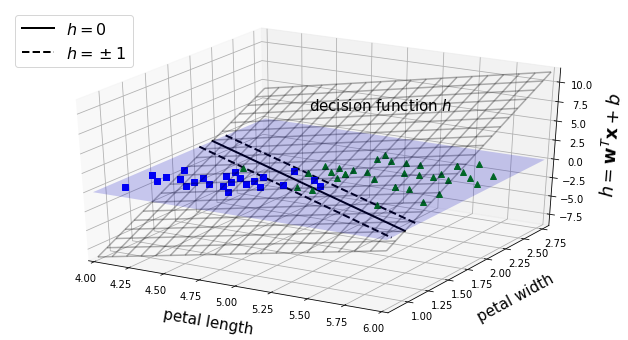

In [31]:
# 결정 함수 예측 그래프(추후 이해 필요함...)
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "decision function $h$", fontsize=15)
    ax.set_xlabel(r"petal length", fontsize=15, labelpad=15)
    ax.set_ylabel(r"petal width", fontsize=15, rotation=25, labelpad=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=10)
    ax.legend(loc="upper left", fontsize=16)
    
fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])
plt.show()

#### 해석
- 특성이 2개인 데이터셋이므로 2차원 평면
- 결정 경계는 결정 함수의 값이 0인 점들로 구성되며 이는 두 평면의 교차점으로 직선(굵은 실선)
- 점선은 결정 함수의 값이 1 또는 -1인 점들로 결정 경계에 나란하고 일정한 거리만큼 떨어져 마진을 형성

#### 5.4.2 목적 함수
- 결정 함수의 기울기는 가중치 벡터의 노름 ||W||와 같은데 이 기울기를 2로 나누면 점들이 결정 경계로부터 2배 멀어짐(즉, 마진에 2를 곱한 것과 동일)

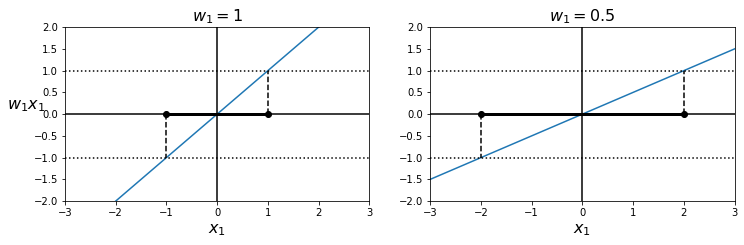

In [32]:
# 벡터 가중치에 따른 마진(작은 가중치 벡터가 라지 마진을 만듬)(추후 이해 필요함...)
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show() # 가중치 벡터가 작아질수록 마진은 커짐

In [33]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)
svm_clf.predict([[5.3, 1.3]])

array([1.])

#### 5.4.3 콰드라틱 프로그래밍

#### 5.4.4 쌍대 문제
- 원 문제라는 제약이 있는 최적화 문제가 주어지면 쌍대 문제라고 하는 깊게 관련된 다른 문제로 표현할 수 있음
- SVM 문제는 이 조건을 만족시킴(LinearSVC, LinearSVR의 매개변수 dual의 기본값 True를 False로 바꾸면 원 문제를 선택 // SVC, SVR은 쌍대 문제만)
- 따라서 원 문제 또는 상대 문제 중 하나를 선택하여 풀 수 있음

#### 5.4.5 커널 SVM
- 훈련 샘플을 다항식 변환하여 적용하는 것과 SVM 알고리즘에서 커널을 적용하는 것은 완전히 똑같음(커널 트릭)
- 가장 널리 사용되는 커널
    - 선형
    - 다항식
    - 가우시안 RBF
    - 시그모이드

#### 5.4.6 온라인 SVM

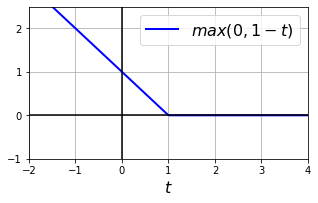

In [34]:
# 힌지 손실(추후 이해 필요함...)
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()

### 추가. 훈련시간

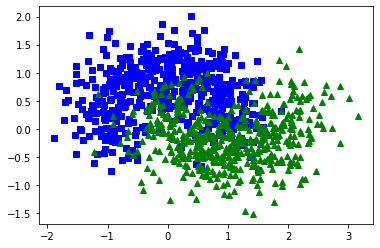

In [35]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42) # make_moons 데이터 1000개 생성
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

[LibSVM]0 0.1 0.6832818984985352
[LibSVM]1 0.01 0.7013330459594727
[LibSVM]2 0.001 0.8809232711791992
[LibSVM]3 0.0001 1.558532953262329
[LibSVM]4 1e-05 2.8298726081848145
[LibSVM]5 1.0000000000000002e-06 3.233964204788208
[LibSVM]6 1.0000000000000002e-07 2.5852696895599365
[LibSVM]7 1.0000000000000002e-08 2.677764892578125
[LibSVM]8 1.0000000000000003e-09 2.884094476699829
[LibSVM]9 1.0000000000000003e-10 2.7258148193359375


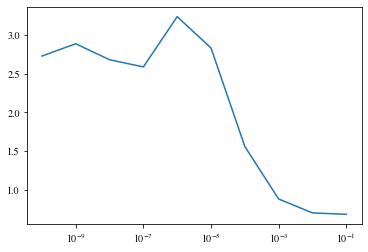

In [36]:
# tol(허용 오차)에 따른 훈련 시간
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1) # tol ==> 허용 오차(LinearSVR, SVR에서 사용)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.rcParams['font.family'] = 'stixgeneral'
plt.semilogx(tols, times)
plt.rcParams['font.family'] = 'NanumBarunGothic'

## 5.5 연습문제

#### 1. 서포트 벡터 머신의 근본 아이디어는 무엇인가요?
- 서포트 벡터 머신의 근본적인 아이디어는 클래스 사이에 가능한 한 가장 넓은 '도로'를 내는 것이다. 다시 말해 두 클래스를 구분하는 결정 경계와 샘플 사이의 마진을 가장 크게 하는 것이 목적이다. 소프트 마진 분류를 수행할 때는 SVM이 두 클래스를 완벽하게 나누는 것과 가장 넓은 도로를 내는 것 사이에 절충안을 찾는다(즉, 몇 개의 샘플은 도로 안에 놓일 수 있다.). 또 하나의 핵심적인 아이디어는 비선형 데이터셋에서 훈련할 때 커널 함수를 사용하는 것이다.

#### 2. 서포트 벡터가 무엇인가요?
- SVM이 훈련된 후 경계를 포함에 도로에 놓인 어떤 샘플을 의미한다. 결정 경계는 전적으로 서포트 벡터에 의해 결정된다. 서포트 벡터가 아닌(즉, 도로 밖에 있는) 어떤 샘플도 영향을 주지 못한다. 이런 샘플은 삭제하고 다른 샘플을 더 추가하거나, 다른 곳으로 이동시킬 수 있다. 샘플이 도로 밖에 있는 한 결정 경계에 영향을 주지 못할 것이다. 예측을 계산할 때는 전체 훈련 세트가 아니라 서포트 벡터만 관여(내적을 구함)된다.

#### 3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?
- SVM은 클래스 사이에 가능한 한 가장 큰 도로를 내는 것이므로 훈련 세트의 스케일이 맞지 않으면 크기가 작은 특성을 무시하는 경향이 있기 때문이다.

#### 4. SVM 분류기가 샘플을 분류할 때 신뢰도 점수와 확률을 출력할 수 있나요?
- SVM 분류기는 테스트 샘플과 결정 경계 사이의 거리를 출력할 수 있으므로 이를 신뢰도 점수로 사용할 수 있다. 그러나 이 점수를 클래스 확률의 추정값으로 바로 변환할 수는 없다. 사이킷런에서 SVM 모델을 만들 때 probability=True로 설정하면 훈련이 끝난 후(훈련 데이터에 5-겹 교차 검증을 사용하여 추가로 훈련시킨) SVM의 점수에 로지스틱 회귀를 훈련시켜 확률을 계산한다. 이 설정은 SVM 모델에 predict_proba()와 predict_log_proba() 메서드를 추가시킨다.

#### 5. 수백만 개의 샘플과 수백 개의 특성을 가진 훈련 세트에서 SVM 모델을 훈련시키려면 원문제와 쌍대 문제 중 어떤 것을 사용해야 하나요?
- 커널 SVM은 쌍대 형식만 사용할 수 있기 때문에 이 질문은 선형SVM에만 해당한다. 원 문제의 계산 복잡도는 훈련 샘플 수 m에 비례하지만, 쌍대 형식의 계산 복잡도는 m^2과 m^3 사이에 값에 비례한다. 그러므로 수백만 개의 샘플이 있다면 쌍대 형식은 너무 느려질 것이므로 원 문제를 사용해야 한다.

#### 6. RBF 커널을 사용해 SVM 분류기를 훈련시켰더니 훈련 세트에 과소적합된 것 같습니다. gamma를 증가시켜야 할까요? 감소시켜야 할까요? c의 경우는 어떤가요?
- RBF 커널에 훈련된 SVM 분류기가 훈련 세트에 과소적합이라면 규제가 너무 큰 것일 수 있다. 규제를 줄이려면 gamma나 c(또는 둘 다) 값을 증가시켜야 한다.

#### 7. 이미 만들어진 QP 알고리즘 라이브러리를 사용해 소프트 마진 선형 SVM 분류기를 학습시키려면 QP 매개변수(H, f, A, b)를 어떻게 지정해야 하나요?
- 핸즈온 머신러닝 p601 참고

#### 8. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.

#### 9. MNIST 데이터셋에 SVM 분류기를 훈련시켜보세요. SVM 분류기는 이진 분류기라서 OvA 전략을 사용해 10개의 숫자를 분류해야 합니다. 처리 속도를 높이기 위해 작은 점증 세트로 하이퍼파라미터를 조정하는 것이 좋습니다. 어느 정도까지 정확도를 높일 수 있나요?

#### 10. 캘리포티아 주택 가격 데이터셋에 SVM 회귀를 훈련시켜보세요.